In [81]:
import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import itertools
import numpy as np
import brewer2mpl

%matplotlib inline

def get_graph(dataset):

    size = (8, 6)
    fig = plt.figure(figsize=size)

    fig.set_size_inches(size)
    fs = 18

    title = dataset.upper() 

    plt.title(title, fontsize=fs)  # , family='Arial')

    # beautify
    ax = plt.axes()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    # Ensure that the axis ticks only show up on the bottom and left of the
    # plot.
    ax.get_xaxis().tick_bottom()
    ax.spines['bottom'].set_color('.8')
    ax.spines['left'].set_color('.8')
    ax.get_yaxis().tick_left()

    plt.xticks(fontsize=fs)
    plt.yticks(fontsize=fs)
    ax.get_yaxis().set_tick_params(which='major', color=".75", direction='out')
    ax.get_xaxis().set_tick_params(which='major', color=".75", direction='out')

    plt.grid(color='.75', which='major', axis='y', linestyle='-', linewidth=1)

    # , family='Arial')
    plt.xlabel('Subinstance k', fontsize=fs)
    # , family='Arial')
    plt.ylabel('Oracle Accuracy', fontsize=fs)

    return ax, fig


def plot_bar(name, x, ys, labels=None):

    width = .35
#     name = 'data1'
    
    n_methods = len(ys)
    group_size = (n_methods+1) * width

    ind = np.arange(0, len(x) * group_size,group_size)

    colors_n = itertools.cycle(brewer2mpl.get_map('Paired', 'qualitative', 8).mpl_colors)
    

    ax, fig = get_graph(name)
    
    i_graph= 0
    
    for  y, lab in zip(ys, labels):
        curr_color = colors_n.next()

        r, g, b = curr_color 

        darker_color = (max(r - .25, 0), max(0, g - .25), max(0,b - .25))
        plt.bar(ind + (width * i_graph), y, width, ecolor=darker_color, color=curr_color, label=lab)#, hatch=patterns.next())

        if True: 
            for a, b in zip(ind + (width * i_graph), y):
                plt.annotate("{0:.2f}".format(b)[1:], (a+0.35, b+.005), ha='right', fontsize=13)
        i_graph += 1
    ax.set_xticks(ind+(1*width* n_methods /2))

    ax.set_xticklabels( ['10', '25', '50', '75', '100', 'Full'] )

    plt.locator_params(axis='y', nbins=6)

    lg = plt.legend(loc='lower center', frameon=True, numpoints=1, fontsize=14, ncol=3, bbox_to_anchor=(.5, -.25))
 
    lg.get_frame().set_facecolor('#FFFFFF')
    lg.get_frame().set_edgecolor('#FFFFFF')
    min_y = np.min(ys)
    print min_y
    if min_y > .5:
#         tmp = np.around(min_y * 10, decimals=1) - 1
        plt.ylim([0.5 ,1.015])
    else:
        plt.ylim([0.2, 1.1])
#     plt.ylim([0.2, 1.1])
    plt.savefig(name,bbox_inches="tight", dpi=200, transparent=True)


0.0140272200077


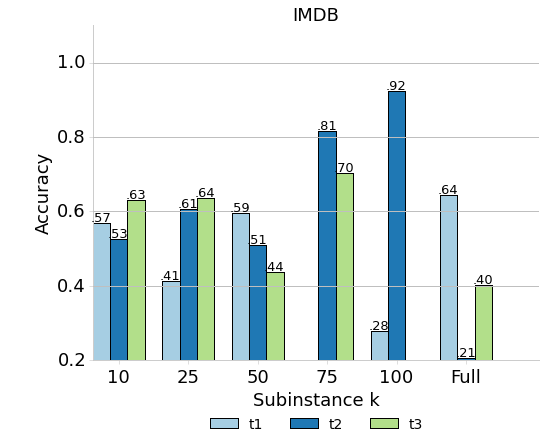

In [75]:
y = np.random.sample((3,6))
x = range(6)
plot_bar('imdb', x, y, labels=['t1','t2','t3'])

0.634616248


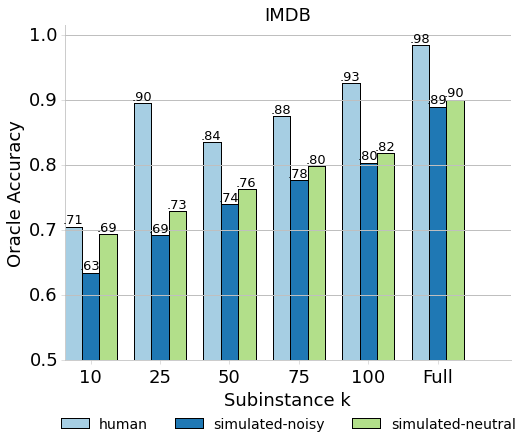

In [82]:
imdb= {'human':[0.705263158, 0.895522388, 0.835526316, 0.875, 0.925714286, 0.984455959], 
'pred':[0.634616248, 0.692190237, 0.740288319, 0.77662011, 0.803835272, 0.89], 
'neut':[0.693303279, 0.729074137, 0.762963733, 0.798772271, 0.817920062, 0.900572812]}

sraa = {'human':[0.833333333, 0.905405405, 0.957142857, 0.978723404, 0.95049505, 0.959183673], 
'pred':[0.727324023, 0.854845535, 0.928856914, 0.95556496, 0.969530258, 0.987022147], 
'neut':[0.787673093, 0.909520789, 0.959889491, 0.973279432, 0.980967601, 0.99111639]}

plot_bar('imdb', x, [imdb['human'],imdb['pred'],imdb['neut']], labels=['human', 'simulated-noisy', 'simulated-neutral'])

0.727324023


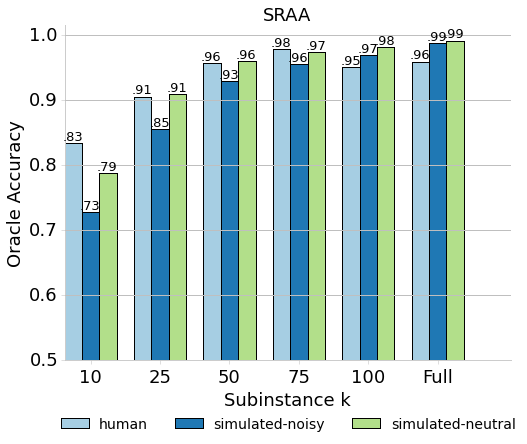

In [83]:
plot_bar('sraa', x, [sraa['human'],sraa['pred'],sraa['neut']], labels=['human', 'simulated-noisy', 'simulated-neutral'])